## <b>Understanding Autocorrelation and Partial Autocorrelation in Time Series Analysis

This notebook focuses on two critical concepts in time series analysis: Autocorrelation (AC) and Partial Autocorrelation (PAC). These concepts play a pivotal role in the development and refinement of time series models, particularly in ARIMA (AutoRegressive Integrated Moving Average) and its variants.

### <b>Autocorrelation (AC)
#### 1. Definition: Autocorrelation, also known as serial correlation, refers to the correlation of a time series with its own past and future values. Essentially, it measures how much a variable in a time series is linearly related to past versions of itself.

#### 2.Importance in ARIMA:

##### A) Identifying the AR term in ARIMA: The AC plot (or correlogram) helps in identifying the appropriate number of AR (AutoRegressive) terms in an ARIMA model. Peaks in the AC plot indicate potential AR terms.
##### B) Stationarity Check: Autocorrelation is used to check if a time series is stationary, which is a crucial assumption in ARIMA modeling.

AC and PAC in Model Building
Model Diagnostic Tools: Both AC and PAC plots are used as diagnostic tools to identify the order of the AR and MA parts of the ARIMA model.
Improving Model Accuracy: Proper identification of AC and PAC leads to more accurate models, as it ensures that the model includes the correct number of lags for both AR and MA components.
Residual Analysis: After fitting an ARIMA model, AC and PAC plots are used to analyze the residuals. If the residuals display significant autocorrelation, it suggests that the model can be further improved.
Practical Application
In this notebook, we will go through practical examples to demonstrate how to generate and interpret AC and PAC plots using Python libraries such as statsmodels and matplotlib. We will also discuss how to integrate these findings into the ARIMA modeling process for effective time series forecasting.

Understanding AC and PAC is essential for anyone looking to delve into time series analysis, as they provide foundational insights into the temporal structure of the data and guide the specification of appropriate time series models.

Download Stock Data:

We use yfinance to download historical data for Google (GOOG).
The data is fetched for the period from June 21, 2021, to June 18, 2022.
The progress parameter is set to False to disable the progress bar during the download.

In [1]:
import pandas as pd
import yfinance as yf


data = yf.download('GOOG',
                      start='2021-06-21',
                      end='2022-06-18',
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
247 2022-06-13  107.445999  109.218498  106.588051  106.876503  106.876503   
248 2022-06-14  106.889999  108.457497  106.351997  107.194000  107.194000   
249 2022-06-15  108.899498  112.063004  108.118752  110.390503  110.390503   
250 2022-06-16  108.149498  109.290497  105.792503  106.636002  106.636002   
251 2022-06-17  106.535004  109.249496  105.628548  107.865501  107.865501   

       Volume  
247  36756000  
248  25480000  
249  33192000  
250  35314000  
251  43516000  


In [2]:

data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2021-06-21,126.455002
1,2021-06-22,126.999496
2,2021-06-23,126.461502
3,2021-06-24,127.281998
4,2021-06-25,126.995003


Plotting the Stock Data

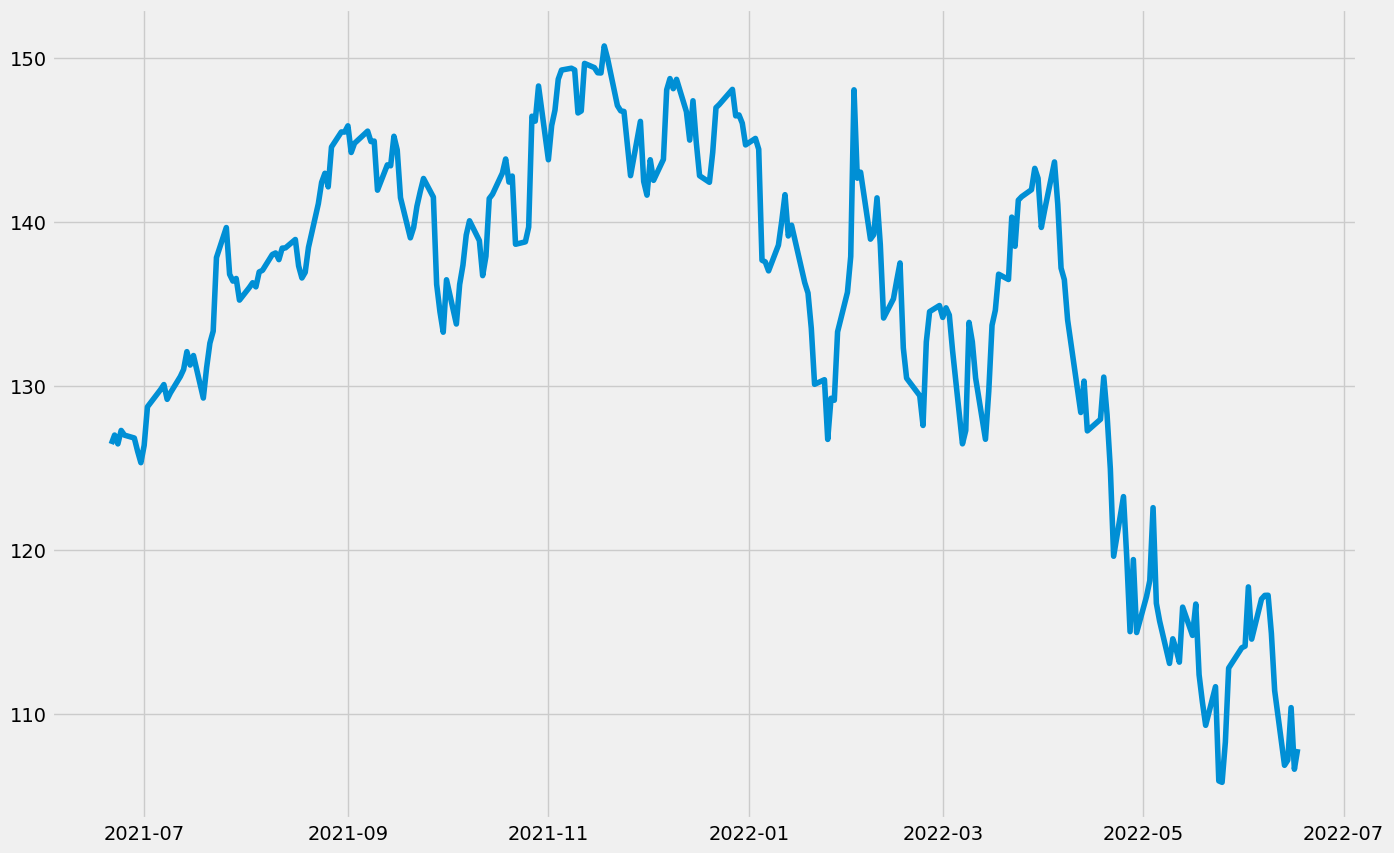

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])


##ARIMA Modeling for Effective Time Series Forecasting

### Understanding the Nature of Your Data
<h3> Step 1: Stationarity vs. Seasonality </h3>
Before diving into the ARIMA model, a key step is to discern the characteristics of your dataset. Is it stationary, or does it show signs of seasonality?

<h3> Data Visualization Insights </h3>
A glance at the graph of closing stock prices in our dataset hints at a non-stationary nature. However, appearances can be deceiving.

<h3> Seasonal Decomposition: A Closer Look </h3>
To confirm our observations, we turn to the robust method of Seasonal Decomposition. This approach deconstructs the time series into three distinct components:

Trend: The overarching direction of the data over time.
Seasonal: Recurring patterns or cycles observed within specific time intervals.
Residuals: The randomness or 'noise' remaining after extracting the trend and seasonal components.
By dissecting our time series data with this method, we gain a clearer, more detailed understanding, paving the way for a more informed application of the ARIMA model.

<Figure size 640x480 with 0 Axes>

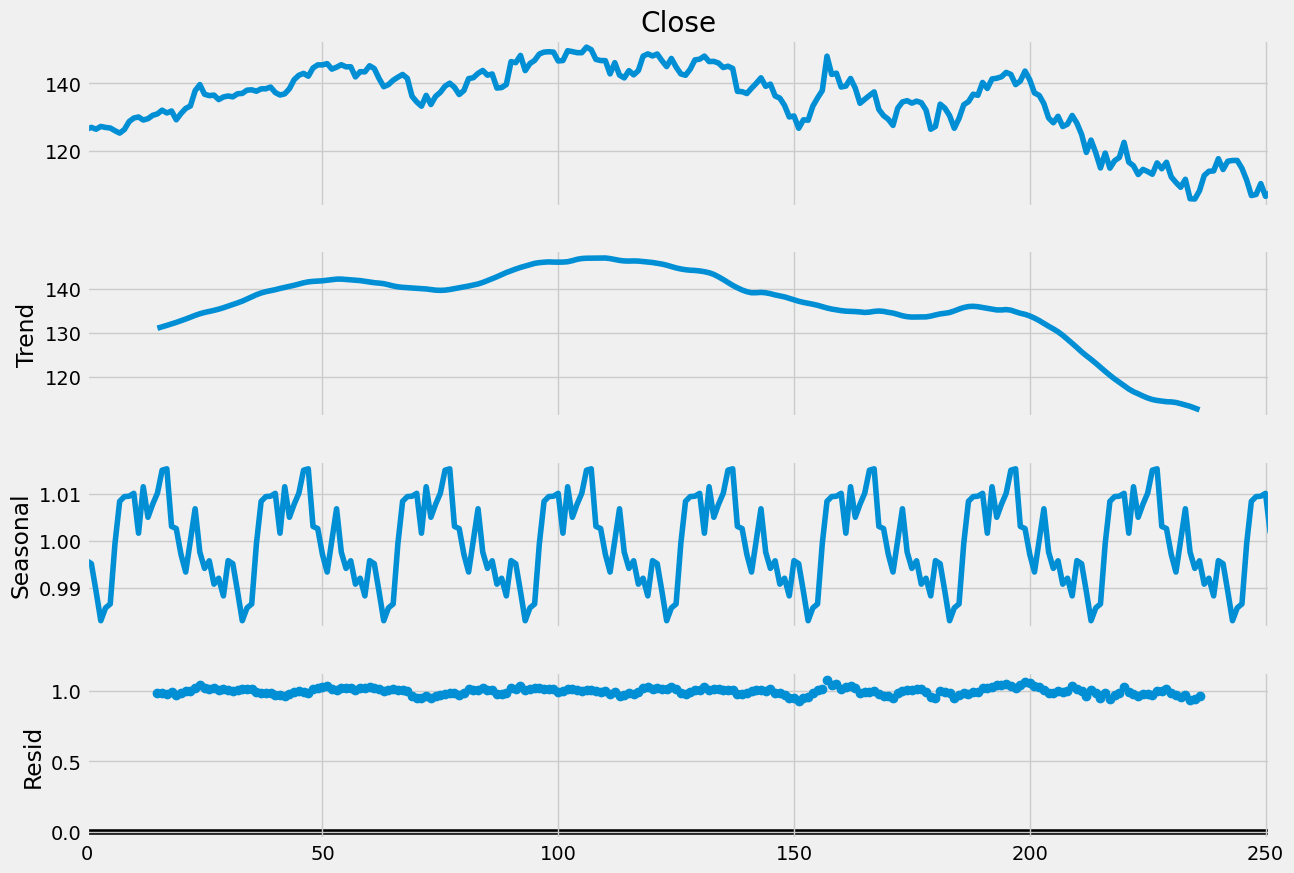

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<h2>Navigating Through Non-Stationary Data: Choosing Between ARIMA and SARIMA</h2>

<h4>Identifying the Nature of Our Dataset</h4>
Our investigation reveals that the dataset exhibits seasonality, rather than stationarity. This insight steers us towards using the Seasonal ARIMA (SARIMA) model for our time series forecasting.

<h4>A Two-Step Modeling Approach </h4>
Before jumping straight into SARIMA, we'll start with the ARIMA model. This sequential approach allows for a comprehensive learning experience, familiarizing you with both models.

<h4> Determining the Key Parameters: p, d, q </h4>
For effective modeling in both ARIMA and SARIMA, we need to identify the optimal values for the parameters p, d, and q.

##### Value of p: Determined by plotting the autocorrelation of the 'Close' column.

##### Value of q: Found by plotting the partial autocorrelation.

##### Value of d: This is where seasonality comes into play. The value of d is typically 0 or 1. We use 0 for stationary data and 1 for seasonal data. Given our dataset's seasonal nature, we opt for d = 1.

### Discovering the Value of p
Let's delve into how exactly we can pinpoint the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

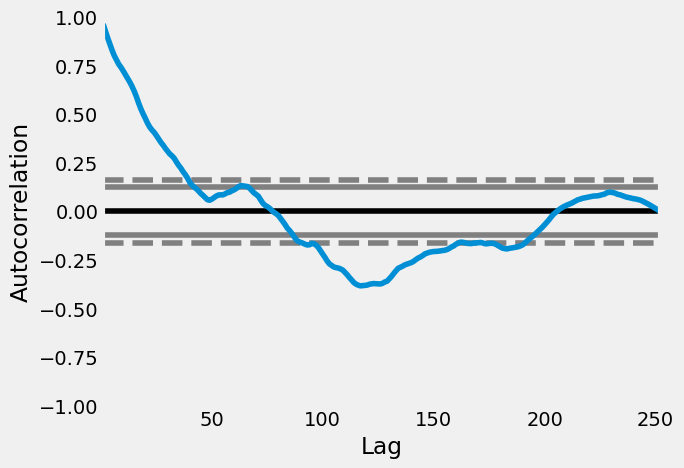

In [6]:

pd.plotting.autocorrelation_plot(data["Close"])

Determining the ARIMA Model Parameters: Unveiling p and q
Deciphering the Value of p from Autocorrelation
Upon examining the autocorrelation plot, we notice a significant trend: the curve begins to decline after crossing the 5th line of the first boundary. This observation is key in determining the value of our parameter p. Thus, we conclude that the value of p is 5.

Next Step: Identifying the Value of q (Moving Average)
With p established, we now shift our focus to uncovering the value of q. Let's explore how the partial autocorrelation plot guides us in this determination:

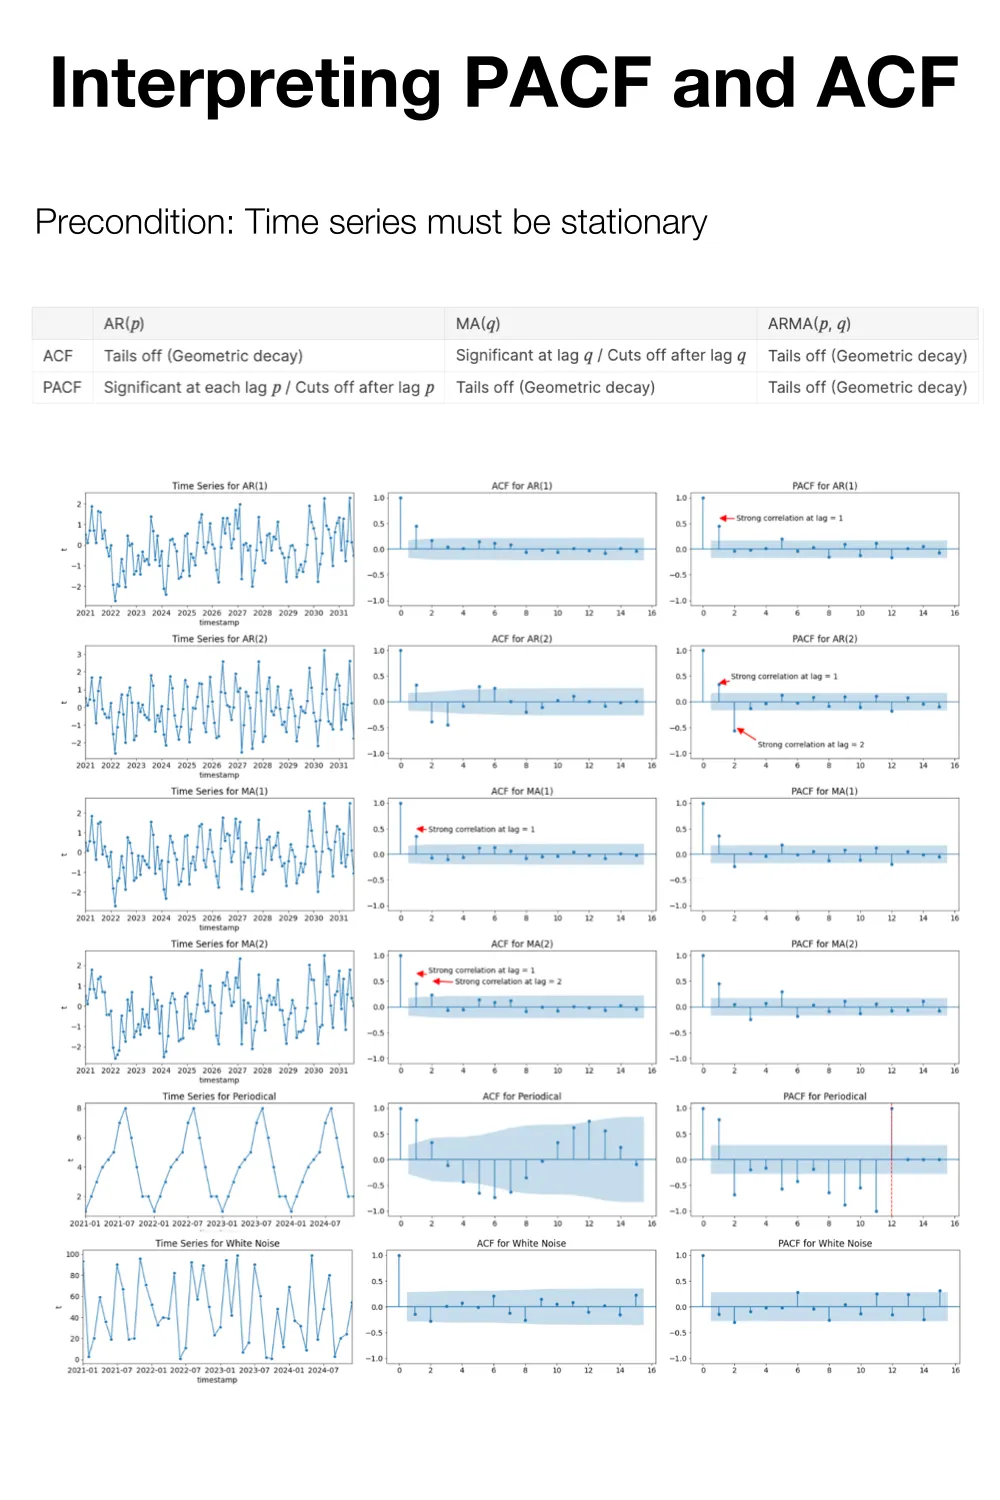

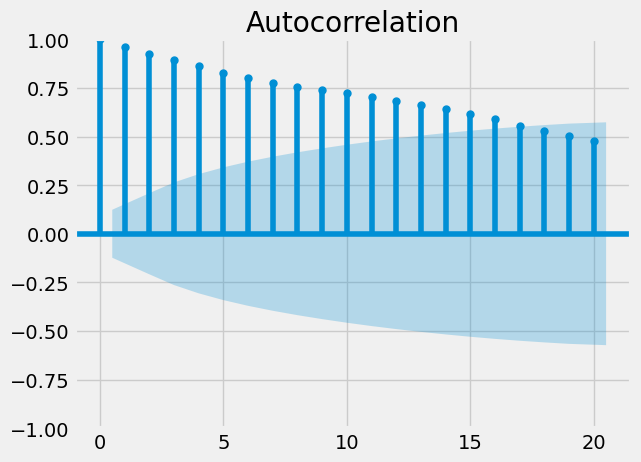

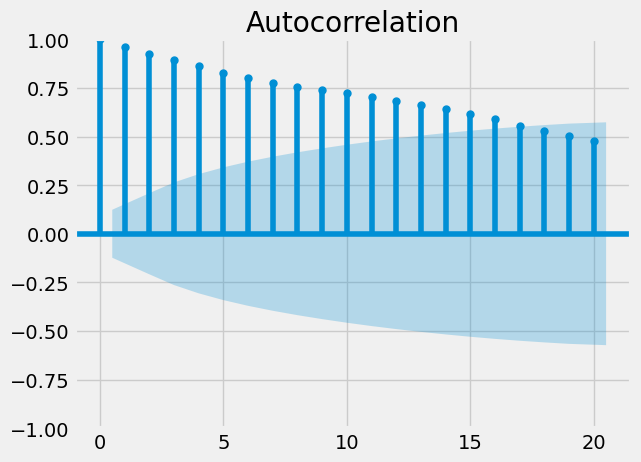

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data["Close"], lags = 20)

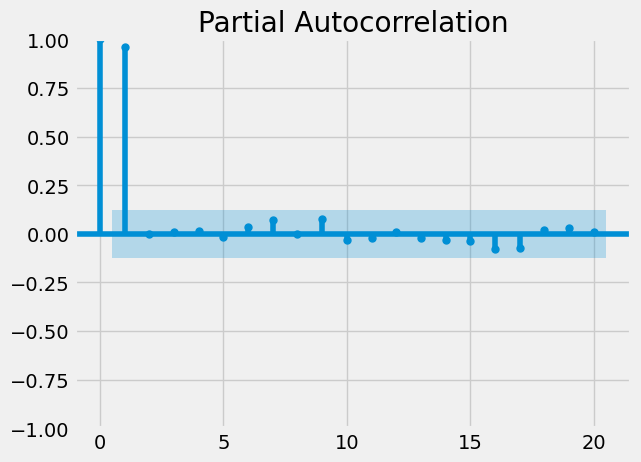

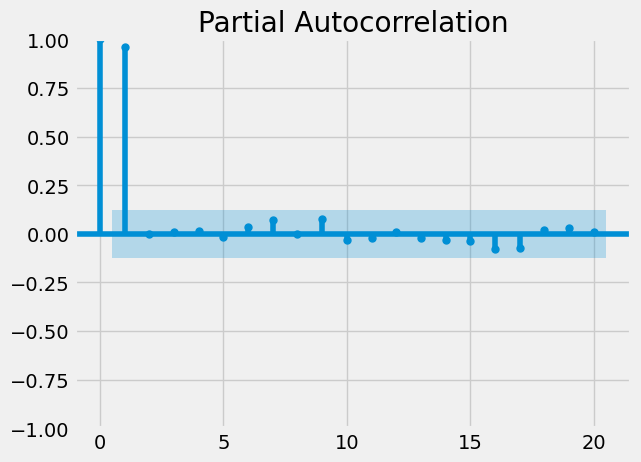

In [32]:

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 20)

Navigating Through the Partial Autocorrelation: Pinning Down q
Interpreting the Partial Autocorrelation Plot
Upon scrutinizing the partial autocorrelation plot, a distinctive pattern emerges. There are precisely two points that stand distinctly apart from the rest. This specific pattern is our key to determining the value of q in our ARIMA model. Consequently, we ascertain that the value of q is 2.

Embarking on Building the ARIMA Model
With the values at hand, we are now primed to construct our ARIMA model. Let's proceed to the modeling phase:

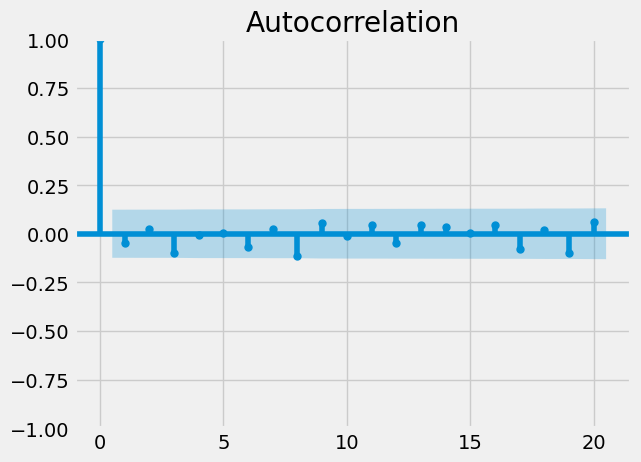

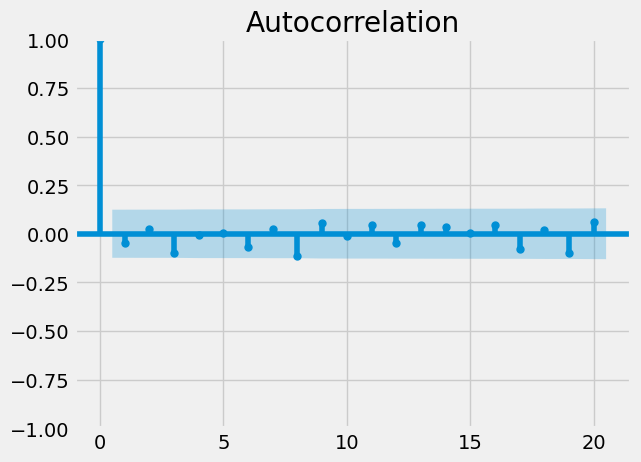

In [25]:
# We need to check for stationarity and then apply differencing method to make it stationary
differenced_series = data["Close"].diff()
differenced_series = differenced_series.dropna()
plot_acf(differenced_series, lags = 20)



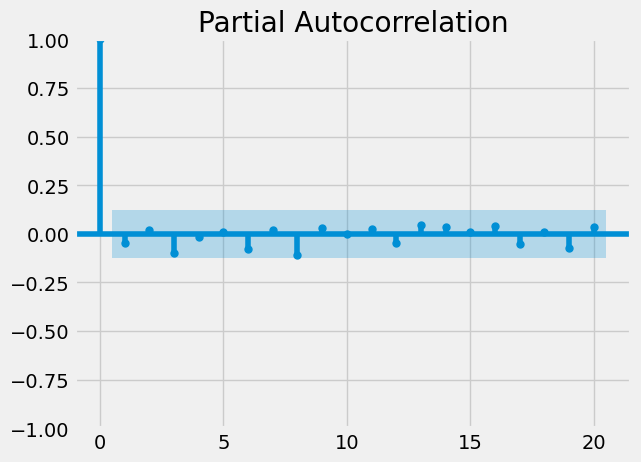

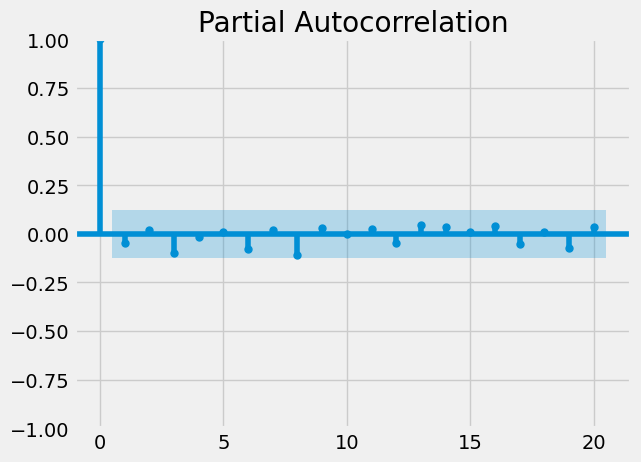

In [26]:
plot_pacf(differenced_series, lags = 20)


In [19]:
# TO understand ACF and PACF in detail lets take a look at the article below
# https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c

In [10]:

p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -576.326
Date:                Fri, 15 Dec 2023   AIC                           1168.652
Time:                        06:26:00   BIC                           1196.856
Sample:                             0   HQIC                          1180.002
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0284      0.516      0.055      0.956      -0.983       1.040
ar.L2          0.7445      0.462      1.611      0.107      -0.161       1.650
ar.L3         -0.0690      0.076     -0.910      0.3

In [11]:

predictions = fitted.predict()
print(predictions)

0        0.000000
1      126.454966
2      126.973538
3      126.498887
4      127.183217
          ...    
247    111.660724
248    107.083674
249    107.660852
250    110.742786
251    107.164263
Name: predicted_mean, Length: 252, dtype: float64


## Understanding the Limitations of ARIMA in Seasonal Data

### Analyzing the Prediction Outcomes
The predictions generated by our ARIMA model deviate from expectations, primarily due to the seasonal nature of our data. It's a crucial insight to recognize that the ARIMA model has inherent limitations when applied to seasonal time series data.

### The Shift to SARIMA: A Seasonal Approach
Given the inadequacy of ARIMA in handling seasonal variations, we pivot to the more apt Seasonal ARIMA (SARIMA) model. Let's explore the steps involved in building a SARIMA model tailored for seasonal data:

In [12]:

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -561.017
Date:                            Fri, 15 Dec 2023   AIC                           1152.034
Time:                                    06:27:33   BIC                           1204.181
Sample:                                         0   HQIC                          1173.048
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9338      0.137    -14.068      0.000      -2.203      -1.664
ar.L2         -1.0236      0.191   

## Forecasting Future Trends: Predicting with SARIMA
### Setting Our Sights on Future Predictions

With the SARIMA model fine-tuned for our seasonal dataset, it's time to venture into forecasting. Our objective now is to predict the stock prices for the upcoming 10 days using the insights and capabilities of the SARIMA model. Let's embark on this predictive journey:



In [13]:



predictions = model.predict(len(data), len(data)+10)
print(predictions)


252    107.699048
253    109.257454
254    107.443951
255    106.910401
256    106.553162
257    106.314119
258    105.655834
259    104.891787
260    106.715108
261    107.441106
262    109.105646
Name: predicted_mean, dtype: float64


Plotting

<Axes: >

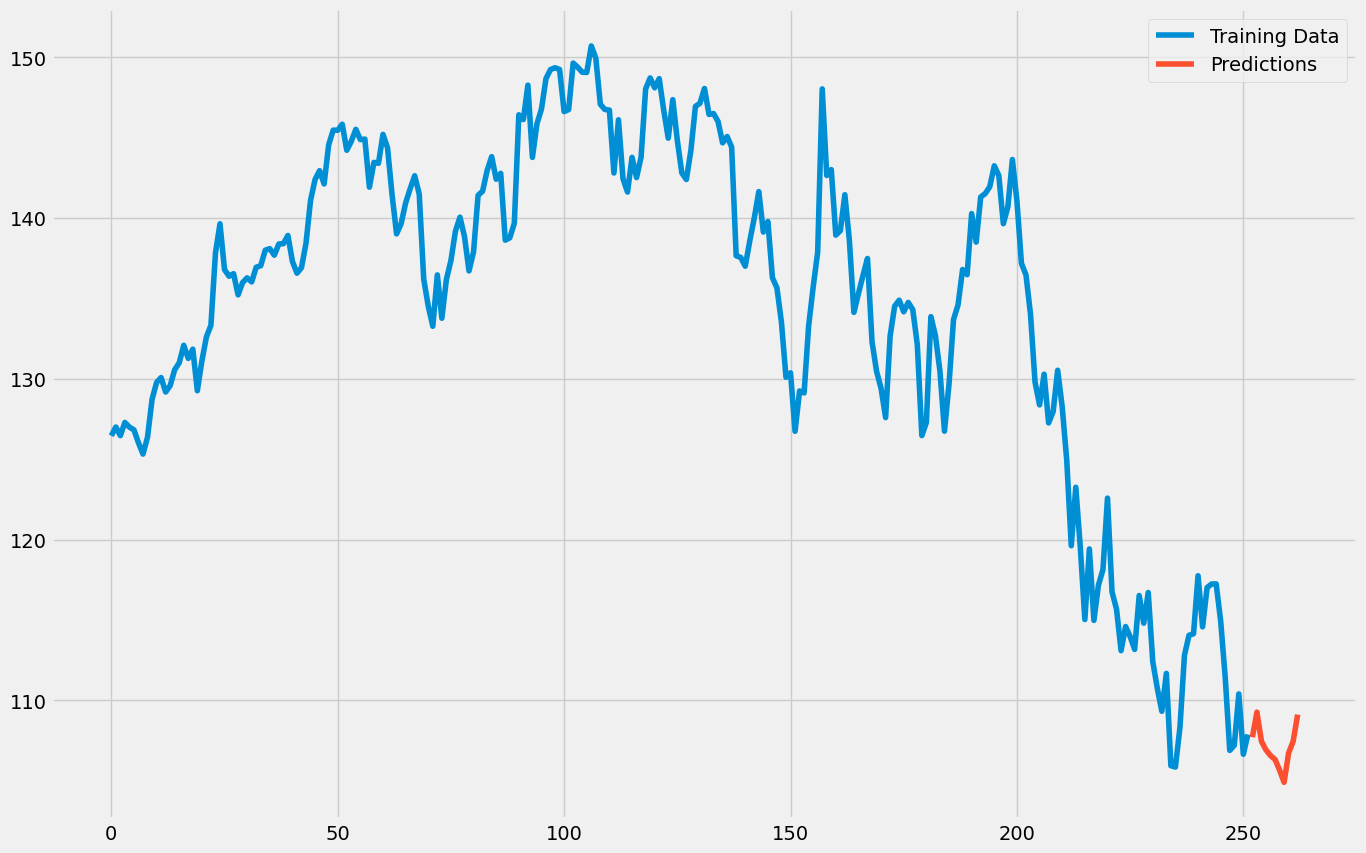

In [14]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")


In [35]:
p, d, q = 1, 1, 1

model_diff=sm.tsa.statespace.SARIMAX(differenced_series,
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 40))
model_diff=model_diff.fit()
print(model_diff.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 40)   Log Likelihood                -523.556
Date:                            Fri, 15 Dec 2023   AIC                           1057.113
Time:                                    07:01:45   BIC                           1073.848
Sample:                                         0   HQIC                          1063.878
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0651      0.067     -0.973      0.331      -0.196       0.066
ma.L1         -0.9997      2.386   